In [35]:
# Imports
import pandas as pd
from statistics import stdev
import seaborn as sns

In [25]:
# Manual Data Entries frame calc: https://www.zapstudio.net/framecalc/

# Video Names
video_names = ["magnesis_btb0_loaded",
               "magnesis_btb1_loaded",
               "magnesis_btb2_loaded",
               "magnesis_btb3_loaded",
               "magnesis_btb4_loaded",
               "magnesis_btb5_loaded", 
                "magnesis_btb6_unloaded"]

# YouTube Links
video_links = ["https://youtu.be/1pFtfTqMEbk",
               "https://youtu.be/L-zFcX_9KXQ",
               "https://youtu.be/ie-jyHMogBA",
               "https://youtu.be/JjF9uuYrRwY",
               "https://youtu.be/Onpj6xYXPTk",
               "https://youtu.be/OiAB8B7RsoE",
               "https://youtu.be/YQFL2Vl-BmY"]

# Retime tool: FIRST FRAME BOW DISAPPEAR -> FIRST FRAME LOAD & LAST FRAME LOAD (0th index based)
load_locations = [[(114, 184), (188, 192), (275, 365), (400, 436), (464, 492), (495, 496), (502, 503)],
                  [(88, 143), (167, 170), (184, 190), (251, 322), (353, 396), (399, 407), (432, 462), (471, 480), (483, 485)],
                  [(14, 15), (50, 51), (85, 86), (129, 179), (218, 219), (235, 238), (279, 280), (281, 355), (400, 438),
                   (472, 486), (490, 500), (503, 511)],
                  [(78, 98), (116, 159), (178, 190), (272, 391), (420, 468), (498, 500), (502, 529), (533, 540), (541, 552)],
                  [(70, 129), (154, 180), (188, 194), (208, 240), (288, 362), (394, 417), (420, 436), (451, 455), (460, 477),
                   (481, 491), (493, 496)],
                  [(87, 148), (190, 202), (280, 364), (404 , 460), (479 , 503), (507, 516), (526, 529)],
                  [(80, 110), (129, 142), (167, 187), (222, 249), (285, 353), (389, 438), (460, 495), (480, 507)]]

# 0 = Loaded, 1 = Unloaded
shrine_states = [0,
                 0, 
                 0, 
                 0,
                 0,
                 0,
                 1]

# Retime tool: FIRST FRAME BOW DISAPPEAR -> FIRST FRAME LOADED (0th index based)
frame_of_shrine_loads = [503,
                         485,
                         511,
                         552,
                         496,
                         529,
                         507]

In [26]:
# Raw dataframe initialisation
df_raw = pd.DataFrame(columns = ["video_name", "video_link", "load_locations", "number_of_loads", 
                                 "length_of_each_load", "sum_of_length_of_each_load", "mean_load_length", "load_length_deviation",
                                 "shrine_state", "frame_of_shrine_load_unload", "load_index_where_shrine_loads", 
                                 "length_of_shrine_load_unload"])

In [27]:
# Function that returns index of shrine load
def find_shrine_load_index(frame, loads):
    for i in range(len(loads)):
        if loads[i][0] <= frame <= loads[i][1]:
            return i

In [28]:
# Function that appends a sample to the dataframe
def create_sample(df, video_name, video_link, load_locations, shrine_state, frame_of_shrine_load):
    series = pd.Series([video_name, video_link, load_locations, len(load_locations),
                        [load[1] - load[0] for load in load_locations], sum([load[1] - load[0] for load in load_locations]),
                        sum([load[1] - load[0] for load in load_locations])/len([load[1] - load[0] for load in load_locations]),
                        stdev([load[1] - load[0] for load in load_locations]),
                        shrine_state, frame_of_shrine_load, find_shrine_load_index(frame_of_shrine_load, load_locations),
                        [load[1] - load[0] for load in load_locations][find_shrine_load_index(frame_of_shrine_load, load_locations)]],
                        index = df.columns)
    return series

Appending samples to dataframe

Reminder that 0 = loaded, 1 = unloaded

Also, everything is 0th index based.

In [29]:
for i in range(len(video_names)):
    df_raw = df_raw.append(create_sample(df_raw, video_names[i], video_links[i], load_locations[i], shrine_states[i],
                                frame_of_shrine_loads[i]), ignore_index = True)
df_raw

,video_name,video_link,load_locations,number_of_loads,length_of_each_load,sum_of_length_of_each_load,mean_load_length,load_length_deviation,shrine_state,frame_of_shrine_load_unload,load_index_where_shrine_loads,length_of_shrine_load_unload
0,magnesis_btb0_loaded,https://youtu.be/1pFtfTqMEbk,"[(114, 184), (188, 192), (275, 365), (400, 436...",7,"[70, 4, 90, 36, 28, 1, 1]",230,32.857143,35.451509,0,503,6,1
1,magnesis_btb1_loaded,https://youtu.be/L-zFcX_9KXQ,"[(88, 143), (167, 170), (184, 190), (251, 322)...",9,"[55, 3, 6, 71, 43, 8, 30, 9, 2]",227,25.222222,25.699114,0,485,8,2
2,magnesis_btb2_loaded,https://youtu.be/ie-jyHMogBA,"[(14, 15), (50, 51), (85, 86), (129, 179), (21...",12,"[1, 1, 1, 50, 1, 3, 1, 74, 38, 14, 10, 8]",202,16.833333,24.108970,0,511,11,8
3,magnesis_btb3_loaded,https://youtu.be/JjF9uuYrRwY,"[(78, 98), (116, 159), (178, 190), (272, 391),...",9,"[20, 43, 12, 119, 48, 2, 27, 7, 11]",289,32.111111,36.195457,0,552,8,11
4,magnesis_btb4_loaded,https://youtu.be/Onpj6xYXPTk,"[(70, 129), (154, 180), (188, 194), (208, 240)...",11,"[59, 26, 6, 32, 74, 23, 16, 4, 17, 10, 3]",270,24.545455,22.944994,0,496,10,3
5,magnesis_btb5_loaded,https://youtu.be/OiAB8B7RsoE,"[(87, 148), (190, 202), (280, 364), (404, 460)...",7,"[61, 12, 84, 56, 24, 9, 3]",249,35.571429,31.266900,0,529,6,3
6,magnesis_btb6_unloaded,https://youtu.be/YQFL2Vl-BmY,"[(80, 110), (129, 142), (167, 187), (222, 249)...",8,"[30, 13, 20, 27, 68, 49, 35, 27]",269,33.625000,17.451463,1,507,7,27


In [30]:
df_raw.to_csv("Data\\raw_data.csv")

In [33]:
corr = df_raw[["number_of_loads", "sum_of_length_of_each_load", "mean_load_length", "load_length_deviation", "shrine_state", "frame_of_shrine_load_unload", "load_index_where_shrine_loads", "length_of_shrine_load_unload"]].astype('float64').corr()

In [34]:
corr

,number_of_loads,sum_of_length_of_each_load,mean_load_length,load_length_deviation,shrine_state,frame_of_shrine_load_unload,load_index_where_shrine_loads,length_of_shrine_load_unload
number_of_loads,1.000000,-0.233113,-0.918860,-0.409430,-0.230283,-0.179629,1.000000,-0.047443
sum_of_length_of_each_load,-0.233113,1.000000,0.576776,0.079130,0.306186,0.488303,-0.233113,0.395908
mean_load_length,-0.918860,0.576776,1.000000,0.373611,0.324666,0.404697,-0.918860,0.221792
load_length_deviation,-0.409430,0.079130,0.373611,1.000000,-0.643579,0.555005,-0.409430,-0.538015
shrine_state,-0.230283,0.306186,0.324666,-0.643579,1.000000,-0.096091,-0.230283,0.920229
frame_of_shrine_load_unload,-0.179629,0.488303,0.404697,0.555005,-0.096091,1.000000,-0.179629,0.199599
load_index_where_shrine_loads,1.000000,-0.233113,-0.918860,-0.409430,-0.230283,-0.179629,1.000000,-0.047443
length_of_shrine_load_unload,-0.047443,0.395908,0.221792,-0.538015,0.920229,0.199599,-0.047443,1.000000


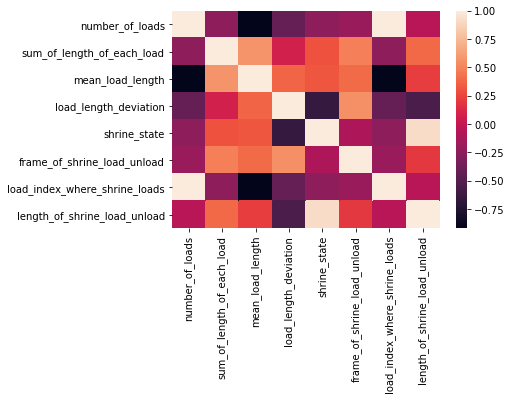

In [36]:
sns.heatmap(corr)